Index(['id', 'Datum', 'Warengruppe', 'Umsatz'], dtype='object')
Spaltennamen: ['id', 'Datum', 'Warengruppe', 'Umsatz']
        id       Datum  Warengruppe      Umsatz
0  1307011  2013-07-01            1  148.828353
1  1307021  2013-07-02            1  159.793757
2  1307031  2013-07-03            1  111.885594
3  1307041  2013-07-04            1  168.864941
4  1307051  2013-07-05            1  171.280754
datetime64[ns]

Unique weekdays in the dataset:
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']

Average Sale per weekday:
   Wochentag      Umsatz
0     Friday  196.796023
1     Monday  193.688449
2   Saturday  241.319882
3     Sunday  246.495651
4   Thursday  193.232274
5    Tuesday  187.944440
6  Wednesday  187.477523


C:\Users\Viki\AppData\Local\Temp\ipykernel_33352\3757556196.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales, x='Wochentag', y='Umsatz', palette='viridis')


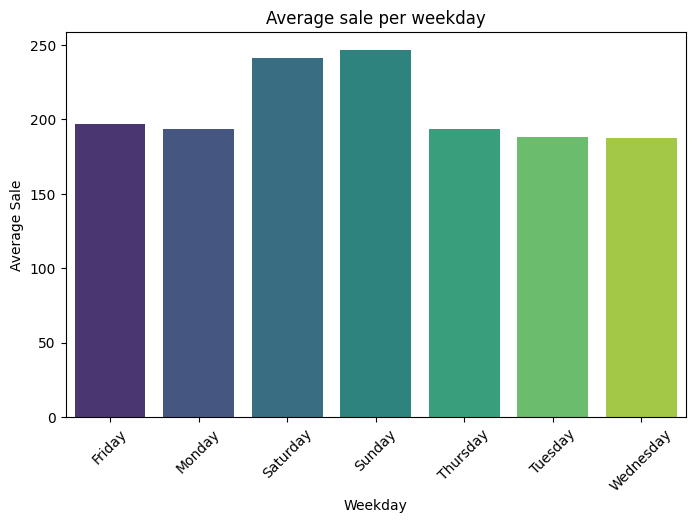

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Read dataset 'umsatzdaten_gekuerzt.csv' and use a barchart to show the relationship of average sales per weekday.
df = pd.read_csv("umsatzdaten_gekuerzt.csv")
print(df.columns)
print("Spaltennamen:", df.columns.tolist())
print(df.head())

df['Datum'] = pd.to_datetime(df['Datum'])
print(df['Datum'].dtypes)
df['Wochentag'] = df['Datum'].dt.day_name()
print("\nUnique weekdays in the dataset:")
print(df['Wochentag'].unique())

avg_sales = df.groupby('Wochentag')['Umsatz'].mean().reset_index()
print("\nAverage Sale per weekday:")
print(avg_sales)

plt.figure(figsize=(8,5))
sns.barplot(data=avg_sales, x='Wochentag', y='Umsatz', palette='viridis')
plt.title('Average sale per weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sale')
plt.xticks(rotation=45)
plt.show()


Calculated mean and standard error per weekday:
   Wochentag        mean       sem
0     Friday  196.796023  3.520063
1     Monday  193.688449  3.503428
2   Saturday  241.319882  4.568145
3     Sunday  246.495651  4.873623
4   Thursday  193.232274  3.603339
5    Tuesday  187.944440  3.450620
6  Wednesday  187.477523  3.524152

Added 95% confidence intervals:
   Wochentag        mean    ci95_low   ci95_high
0     Friday  196.796023  189.896700  203.695347
1     Monday  193.688449  186.821729  200.555168
2   Saturday  241.319882  232.366318  250.273447
3     Sunday  246.495651  236.943350  256.047952
4   Thursday  193.232274  186.169729  200.294820
5    Tuesday  187.944440  181.181226  194.707655
6  Wednesday  187.477523  180.570185  194.384862


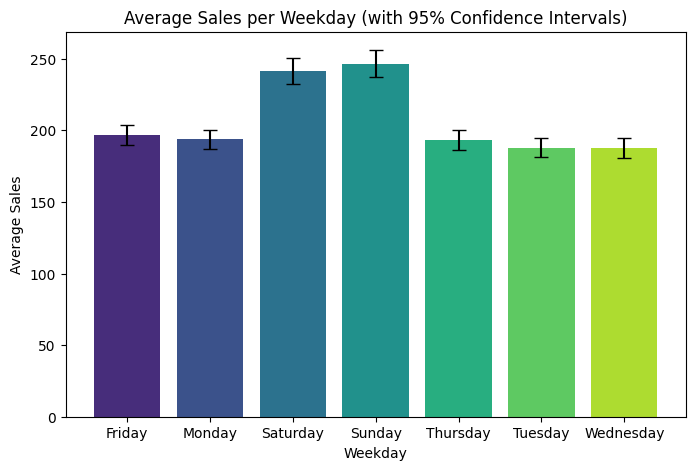

In [26]:
#Confidence Intervals for average sales per weekday
stats_summary = df.groupby('Wochentag')['Umsatz'].agg(['mean', 'sem']).reset_index()
print("\nCalculated mean and standard error per weekday:")
print(stats_summary)

stats_summary['ci95_low'] = stats_summary['mean'] - 1.96 * stats_summary['sem']
stats_summary['ci95_high'] = stats_summary['mean'] + 1.96 * stats_summary['sem']
print("\nAdded 95% confidence intervals:")
print(stats_summary[['Wochentag', 'mean', 'ci95_low', 'ci95_high']])

plt.figure(figsize=(8,5))
plt.bar(stats_summary['Wochentag'], stats_summary['mean'],
        yerr=1.96*stats_summary['sem'], capsize=5, color=sns.color_palette('viridis', len(stats_summary)))
plt.ylabel('Average Sales')
plt.xlabel('Weekday')
plt.title('Average Sales per Weekday (with 95% Confidence Intervals)')
plt.show()


Sorted weekdays with statistics:
   Wochentag        mean       sem    ci95_low   ci95_high
1     Monday  193.688449  3.503428  186.821729  200.555168
5    Tuesday  187.944440  3.450620  181.181226  194.707655
6  Wednesday  187.477523  3.524152  180.570185  194.384862
4   Thursday  193.232274  3.603339  186.169729  200.294820
0     Friday  196.796023  3.520063  189.896700  203.695347
2   Saturday  241.319882  4.568145  232.366318  250.273447
3     Sunday  246.495651  4.873623  236.943350  256.047952


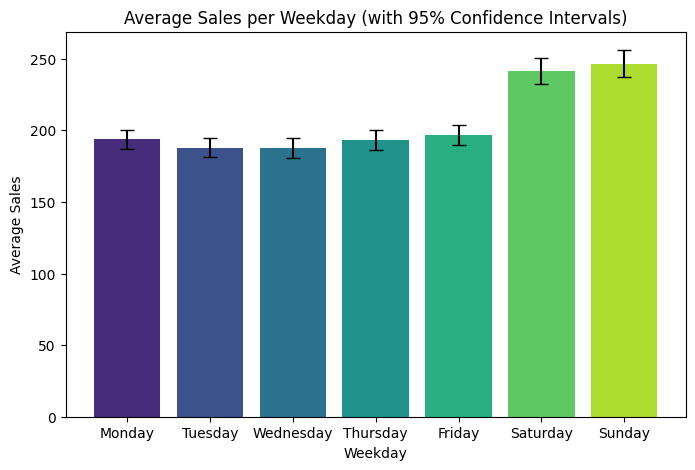

In [27]:
#Sort the weekdays in the correct order (Monday to Sunday)
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
stats_summary['Wochentag'] = pd.Categorical(stats_summary['Wochentag'], categories=ordered_weekdays, ordered=True)
stats_summary = stats_summary.sort_values('Wochentag')
print("\nSorted weekdays with statistics:")
print(stats_summary)    

plt.figure(figsize=(8,5))
plt.bar(stats_summary['Wochentag'], stats_summary['mean'],
        yerr=1.96*stats_summary['sem'], capsize=5, color=sns.color_palette('viridis', len(stats_summary)))
plt.ylabel('Average Sales')
plt.xlabel('Weekday')
plt.title('Average Sales per Weekday (with 95% Confidence Intervals)')
plt.show()